
<h3>Flight Ticket Price Analysis and Prediction</h3>
About Datasets:
<h5>1. Size of training set: 10683 records</h5>
<h5>2. Size of test set: 2671 records</h5>
FEATURES:
<h5>1. Airline: The name of the airline</h5>
<h5>2. Date_of_Journey: The date of the journey</h5>
<h5>3. Source: The source from which the service begins</h5>
<h5>4. Destination: The destination where the service ends</h5>
<h5>5. Route: The route taken by the flight to reach the destination</h5>
<h5>6. Dep_Time: The time when the journey starts from the source</h5>
<h5>7. Arrival_Time: Time of arrival at the destination</h5>
<h5>8. Duration: Total duration of the flight</h5>
<h5>9. Total_Stops: Total stops between the source and destination</h5>
<h5>10. Additional_Info: Additional information about the flight</h5>
<h5>11. Price: The price of the ticket</h5>

In [1]:
# Importing common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [3]:
train_df = pd.read_csv('Data_Train.csv')
train_df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


Data Cleaning

In [8]:
train_df.dropna(inplace=True)
train_df.shape

(10682, 11)

In [9]:
# Checking and removing Duplicate data
train_df.duplicated().sum()

220

In [10]:
train_df.drop_duplicates(inplace=True)
train_df.shape

(10462, 11)

<h3>EDA and Data Preprocessing</h3>

In [11]:
for i in train_df.columns:
    print(f'{i}: Unique Counts{train_df[i].unique().shape}\n{train_df[i].unique()}\n')

Airline: Unique Counts(12,)
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Date_of_Journey: Unique Counts(44,)
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

Source: Unique Counts(5,)
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Destination: Unique Counts(6,)
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Ro

Shape of dataframe: (10462, 11)
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


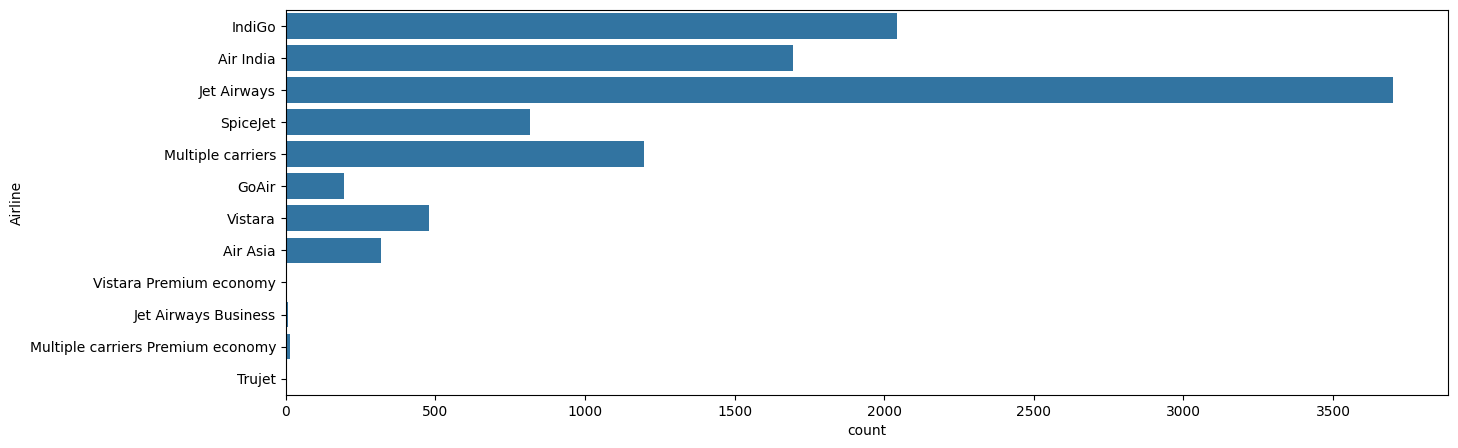

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64


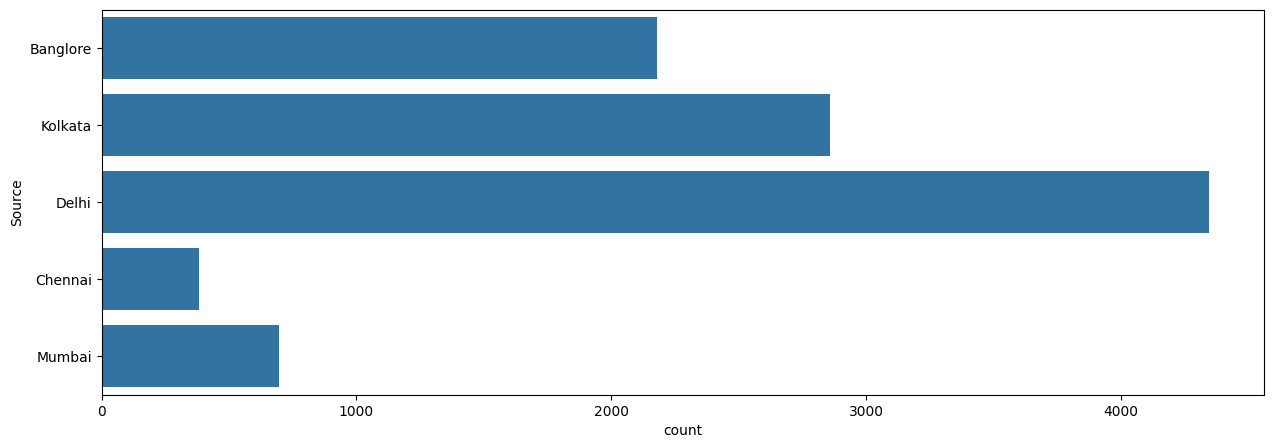

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


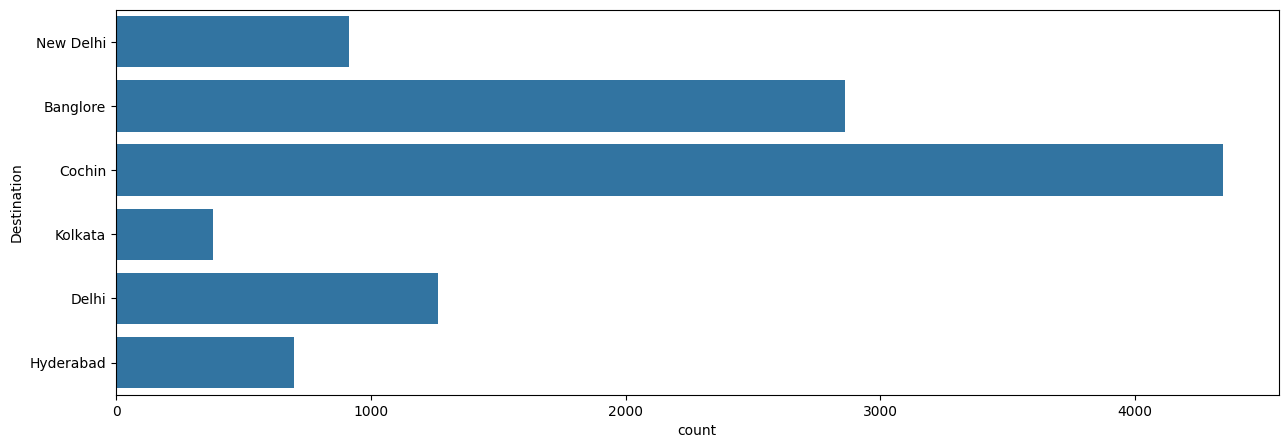

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64


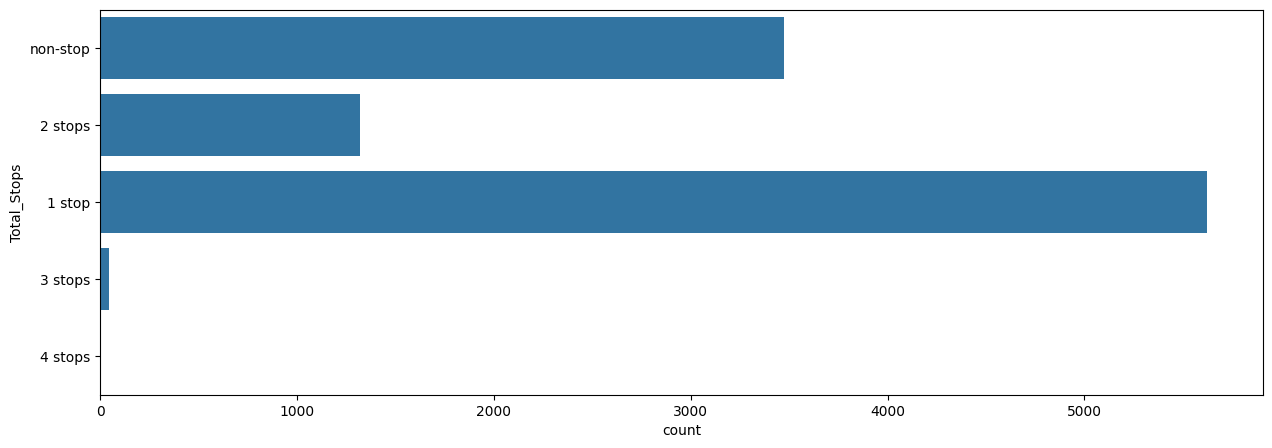

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


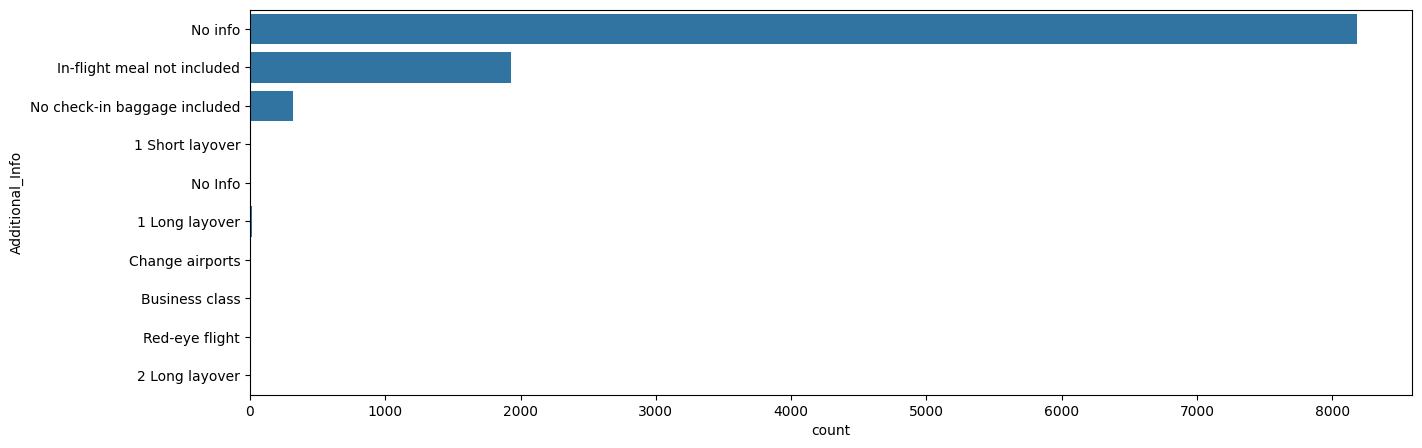

In [12]:
# Checking Unique values
lst = ['Airline','Source','Destination', 'Total_Stops','Additional_Info']

print('Shape of dataframe:',train_df.shape)

for i in lst:
    print(train_df[i].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(train_df[i])
    plt.show()

Observations:


The majority of scheduled flights were operated by Jet Airways, followed by IndiGo, Air India, and others. Delhi was the busiest departure point, while Chennai was the least busy. Cochin was the most frequent destination, whereas Kolkata was the least. The routes are planned to include either one or no stops to maximize convenience. The Additional_Info column generally lacks useful information and can be removed. Since Route and Total_Stops convey the same information, we can eliminate the Route column. Additionally, we need to convert Date_of_Journey, Dep_Time, Arrival_Time, and Duration into datetime format.


In [13]:
# Dropping columns as per observation
train_df.drop(columns=['Additional_Info', 'Route'], inplace=True)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [14]:
# Converting Date_ofJourney to datetime series
train_df["Date_of_Journey"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y")
train_df["Date_of_Journey"].head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

We can extract day and month from the Date_ofJourney into new columns

In [15]:
# Removing day and month from Date_ofJourney
train_df["Journey_day"] = train_df["Date_of_Journey"].dt.day
train_df["Journey_month"] = train_df["Date_of_Journey"].dt.month

train_df[['Journey_day','Journey_month']].head()

,Journey_day,Journey_month
0,24,3
1,1,5
2,9,6
3,12,5
4,1,3


In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [17]:
# Extracting Hours
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour

# Extracting Minutes
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_df.drop(["Dep_Time"], axis = 1, inplace = True)
train_df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50


In [18]:
# Extracting Hours
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour

# Extracting Minutes
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [19]:
# Assigning and converting Duration column into list
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting only minutes from duration

In [20]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

train_df.drop(["Duration"], axis = 1, inplace = True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


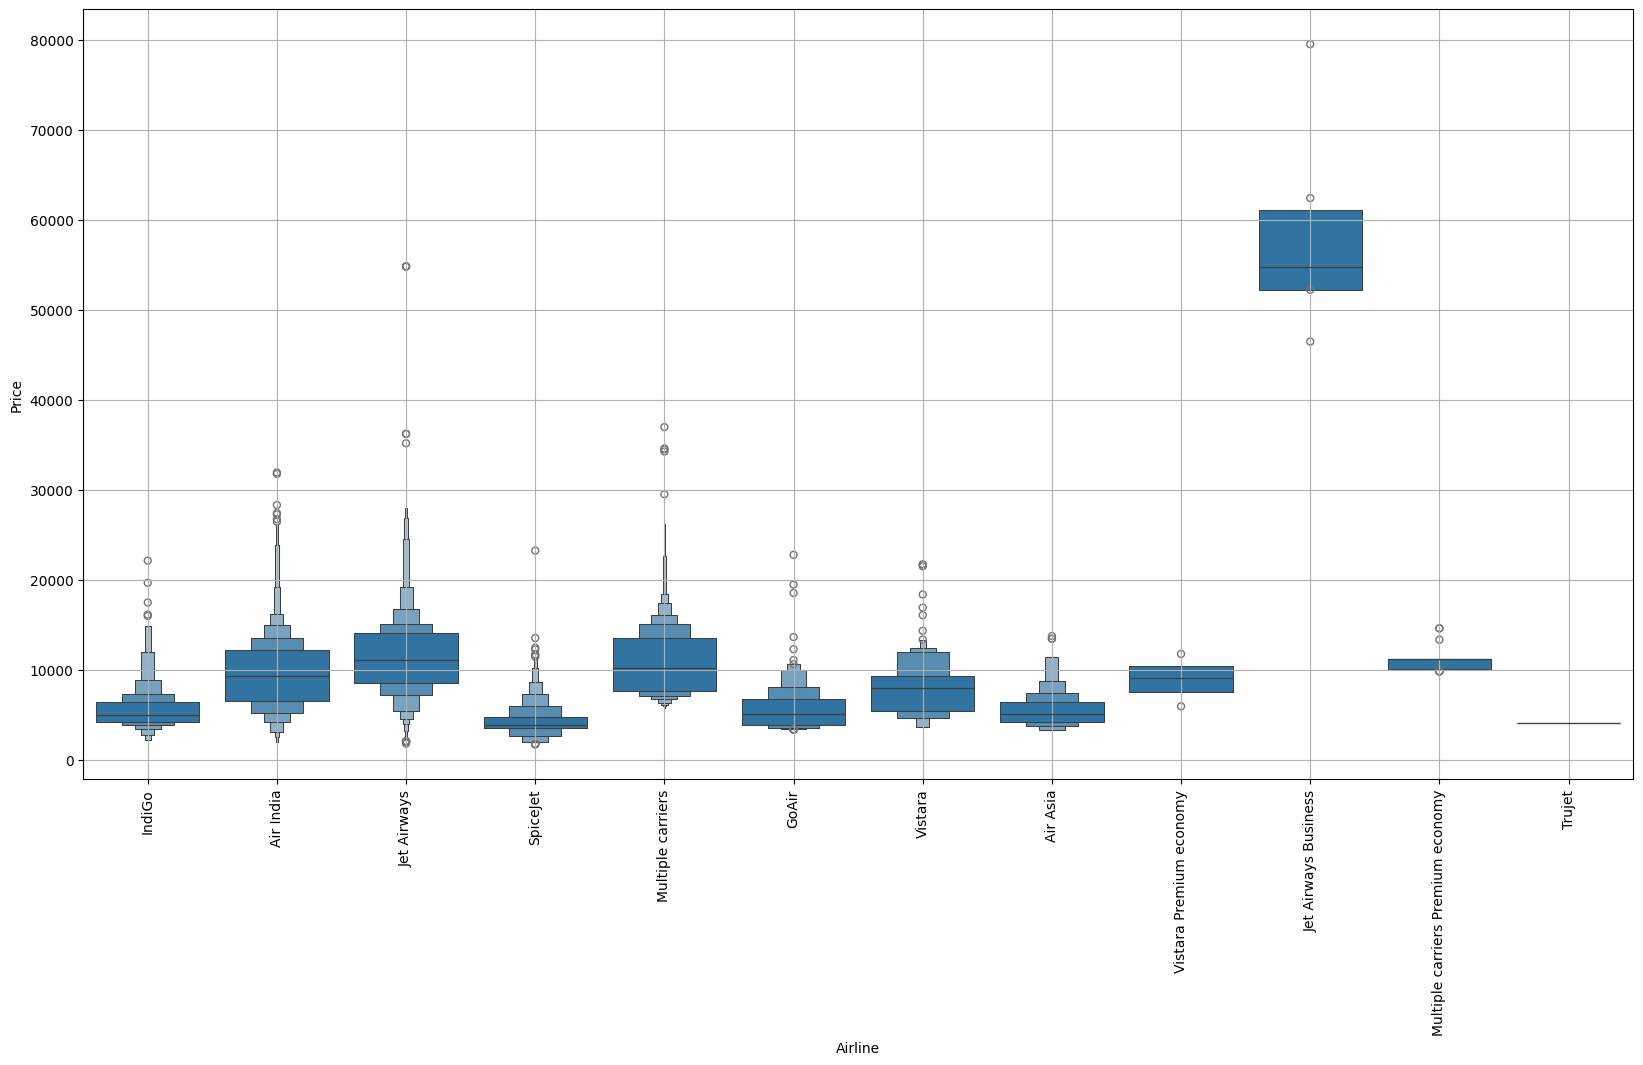

In [21]:
# Insights of Flghts with their respective tickets
plt.figure(figsize=(20,10))
sns.boxenplot(data=train_df, x='Airline', y='Price')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Numerical Encoding


In [22]:
# Label Encoding on Total_Stops
train_df['Total_Stops'] = train_df['Total_Stops'].replace(to_replace=['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],value=[0,1,2,3,4])
train_df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [23]:
# One-Hot Encoding on Airline
Airline = train_df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [24]:
# One-Hot Encoding on Airline
Source = train_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [25]:
# One-Hot Encoding on Airline
Destination = train_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


Creating master dataframe for training

In [26]:
data_train = pd.concat([train_df, Airline, Source, Destination], axis = 1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [27]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


Basic Statistical Summary:
        Total_Stops         Price   Journey_day  Journey_month      Dep_hour  \
count  10462.000000  10462.000000  10462.000000   10462.000000  10462.000000   
mean       0.802332   9026.790289     13.463200       4.701491     12.478494   
std        0.660609   4624.849541      8.467493       1.163802      5.727227   
min        0.000000   1759.000000      1.000000       3.000000      0.000000   
25%        0.000000   5224.000000      6.000000       3.000000      8.000000   
50%        1.000000   8266.000000     12.000000       5.000000     11.000000   
75%        1.000000  12344.750000     21.000000       6.000000     18.000000   
max        4.000000  79512.000000     27.000000       6.000000     23.000000   

            Dep_min  Arrival_hour   Arrival_min  Duration_hours  Duration_mins  
count  10462.000000  10462.000000  10462.000000    10462.000000   10462.000000  
mean      24.404989     13.387689     24.719939       10.026190      28.210189  
std      

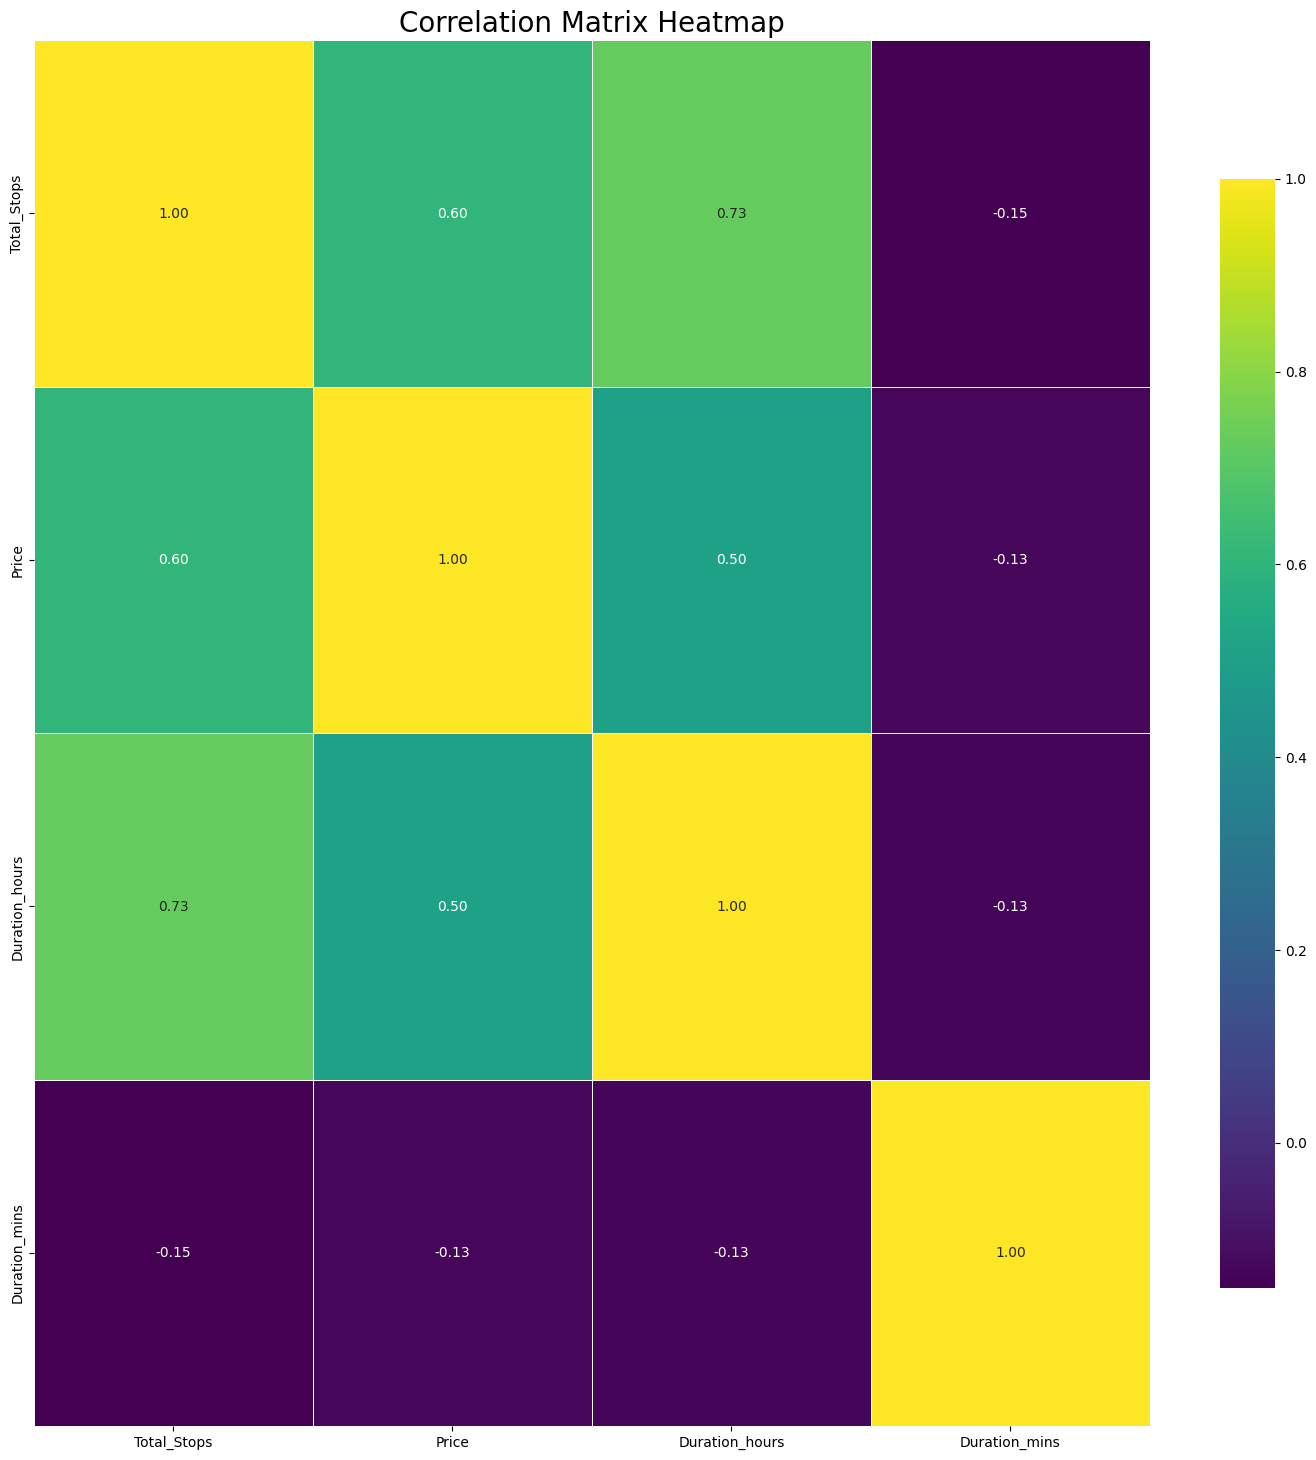

In [31]:
# Assuming 'train_df' is your DataFrame

print("Basic Statistical Summary:")
print(train_df.describe())

numeric_df = train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})


plt.title('Correlation Matrix Heatmap', size=20)
plt.show()


Feature Extraction

In [32]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<h3>Feature Importance</h3>

In [34]:
# Extracting feature importance using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [35]:
print(selection.feature_importances_)

[2.17600106e-01 1.45646323e-01 5.25163195e-02 2.41263759e-02
 2.11786018e-02 2.85611602e-02 1.89374117e-02 1.31351832e-01
 1.72799372e-02 1.06294404e-02 1.79048170e-03 1.47232171e-02
 1.35905446e-01 6.86563779e-02 2.01432742e-02 8.76672275e-04
 2.99241716e-03 8.98052495e-05 5.25077137e-03 8.52448964e-05
 4.78590869e-04 1.19488150e-02 3.03735972e-03 8.31760993e-03
 1.05853574e-02 1.53567504e-02 5.71729745e-03 4.80520369e-04
 2.57364829e-02]


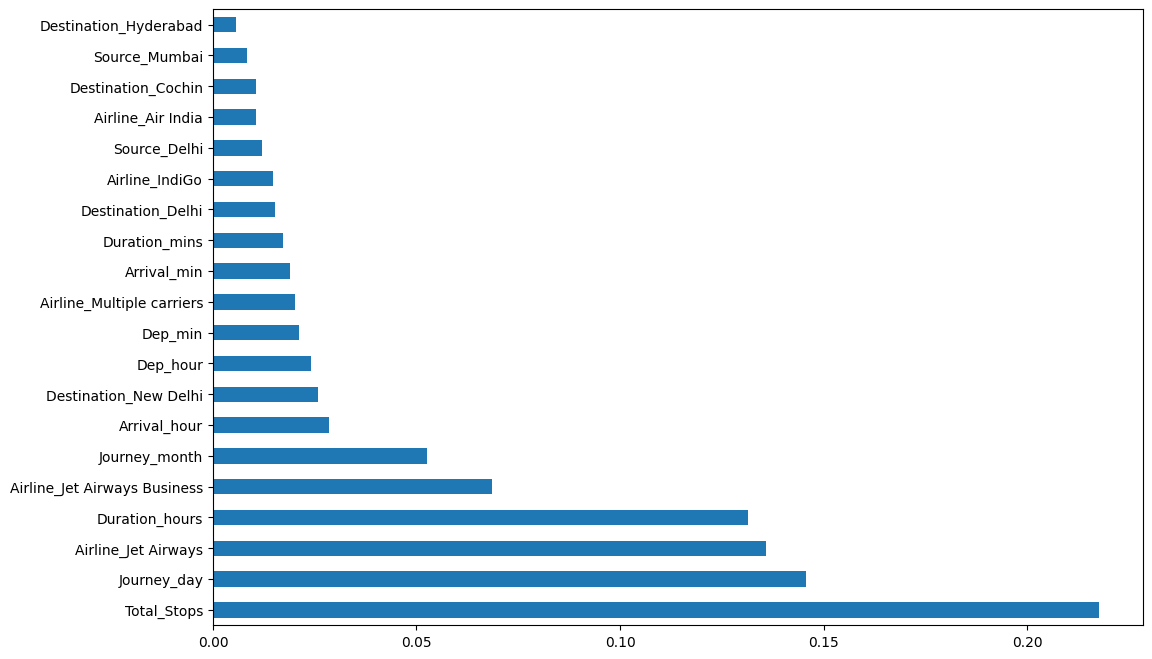

In [36]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<h3>Train-Test Split</h3>

In [37]:
# Splitting data in 80:20 Train-Test Spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Model Building
Implementation of the following models:

Random Forest Regressor, XGBoost Regressor, Linear Regression



In [38]:
master_score = pd.DataFrame()

<h4>1. Linear Regression</h4>

In [39]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred

array([14563.8371828 ,  4552.78666028,  4762.29193427, ...,
       11897.09100291, 11325.81721497, 11599.54703144])

In [40]:
from sklearn import metrics

In [42]:
# Assuming y_test and y_pred are already defined

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('r2_score:', r2)

# Creating dictionary for metrics
metrics_dict = {
    'Model_Name': ['LR'],
    'mae': [mae],
    'mse': [mse],
    'rmse': [rmse],
    'r2_score': [r2]
}

# Converting metrics_dict to temp_df
temp_df = pd.DataFrame(metrics_dict)

# Merging temp_df into master_score
master_score = pd.concat([master_score, temp_df], ignore_index=True)

# Displaying the updated master_score DataFrame
print(master_score)


MAE: 1998.8996862537983
MSE: 8678835.045869939
RMSE: 2945.986260298907
r2_score: 0.5837544362210151
  Model_Name          mae           mse        rmse  r2_score
0         LR  1998.899686  8.678835e+06  2945.98626  0.583754


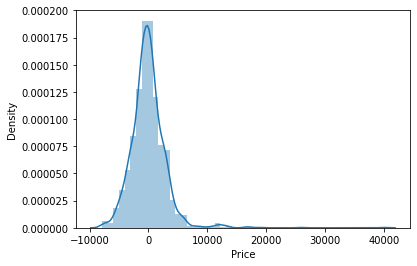

In [38]:
# Plotting the residual-value density
sns.distplot(y_test-y_pred)
plt.show()

<h4>2. Random Forest Regressor</h4>

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)
y_pred

array([14626.87416667,  3847.16      ,  4246.94333333, ...,
       11059.40066667,  7906.12      , 12906.7       ])

In [45]:
import numpy as np
from sklearn import metrics
import pandas as pd

# Assuming y_test and y_pred are already defined

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('r2_score:', r2)

# Creating dictionary for metrics
metrics_dict = {
    'Model_Name': ['RFR'],
    'mae': [mae],
    'mse': [mse],
    'rmse': [rmse],
    'r2_score': [r2]
}

# Converting metrics_dict to temp_df
temp_df = pd.DataFrame(metrics_dict)

# Merging temp_df into master_score using pd.concat
master_score = pd.concat([master_score, temp_df], ignore_index=True)

# Displaying the updated master_score DataFrame
print(master_score)


MAE: 1183.5626872072557
MSE: 3942891.142793249
RMSE: 1985.6714589259848
r2_score: 0.8108950178247532
  Model_Name          mae           mse         rmse  r2_score
0         LR  1998.899686  8.678835e+06  2945.986260  0.583754
1        RFR  1183.562687  3.942891e+06  1985.671459  0.810895


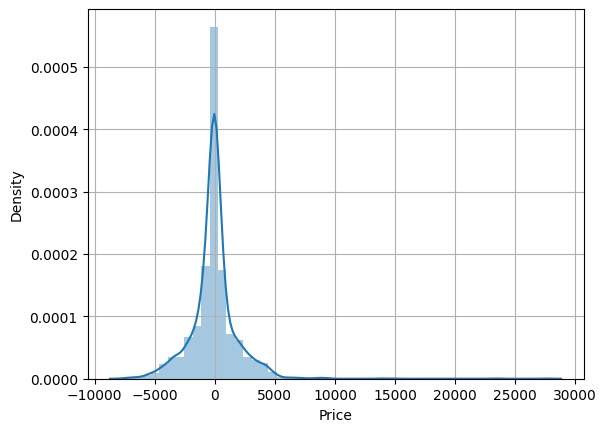

In [46]:
# Plotting the residual-value density
sns.distplot(y_test-y_pred)
plt.grid()
plt.show()

<h4>3. XGBoost Regressor</h4>

In [48]:
from xgboost import XGBRegressor

XGBR = XGBRegressor()

XGBR.fit(X_train, y_train)

y_pred = XGBR.predict(X_test)
y_pred

array([15165.92  ,  3858.4324,  4167.029 , ..., 11043.049 ,  8330.262 ,
       12898.116 ], dtype=float32)

In [50]:
# Assuming y_test, y_pred, and XGBR are already defined
# Assuming master_score is initialized somewhere in your code

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('r2_score:', r2)

# Creating dictionary for metrics
metrics_dict = {
    'Model_Name': 'XGBR',
    'mae': [mae],
    'mse': [mse],
    'rmse': [rmse],
    'r2_score': [r2]
}

# Converting metrics_dict to temp_df
temp_df = pd.DataFrame(metrics_dict)

# Check if master_score is initialized as a DataFrame
if 'master_score' not in locals() or not isinstance(master_score, pd.DataFrame):
    master_score = pd.DataFrame()

# Merging temp_df into master_score using pd.concat
master_score = pd.concat([master_score, temp_df], ignore_index=True)

# Displaying the updated master_score DataFrame
print(master_score)


MAE: 1117.6771176662162
MSE: 3255040.4546335447
RMSE: 1804.1730667077215
r2_score: 0.8438850212037262
  Model_Name          mae           mse         rmse  r2_score
0         LR  1998.899686  8.678835e+06  2945.986260  0.583754
1        RFR  1183.562687  3.942891e+06  1985.671459  0.810895
2       XGBR  1117.677118  3.255040e+06  1804.173067  0.843885


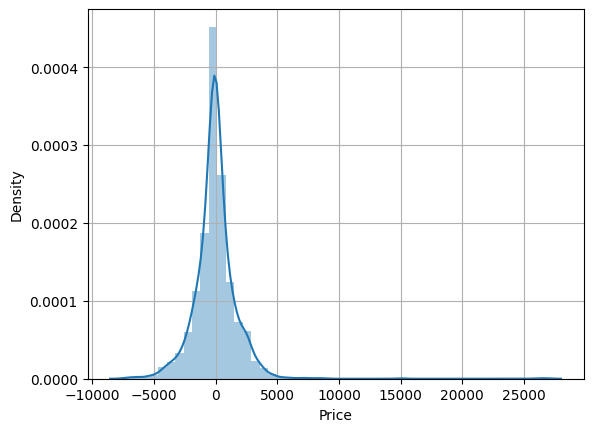

In [51]:
# Plotting the residual-value density
sns.distplot(y_test-y_pred)
plt.grid()
plt.show()

Comparison of Model Metrics

In [52]:
print(master_score)

  Model_Name          mae           mse         rmse  r2_score
0         LR  1998.899686  8.678835e+06  2945.986260  0.583754
1        RFR  1183.562687  3.942891e+06  1985.671459  0.810895
2       XGBR  1117.677118  3.255040e+06  1804.173067  0.843885


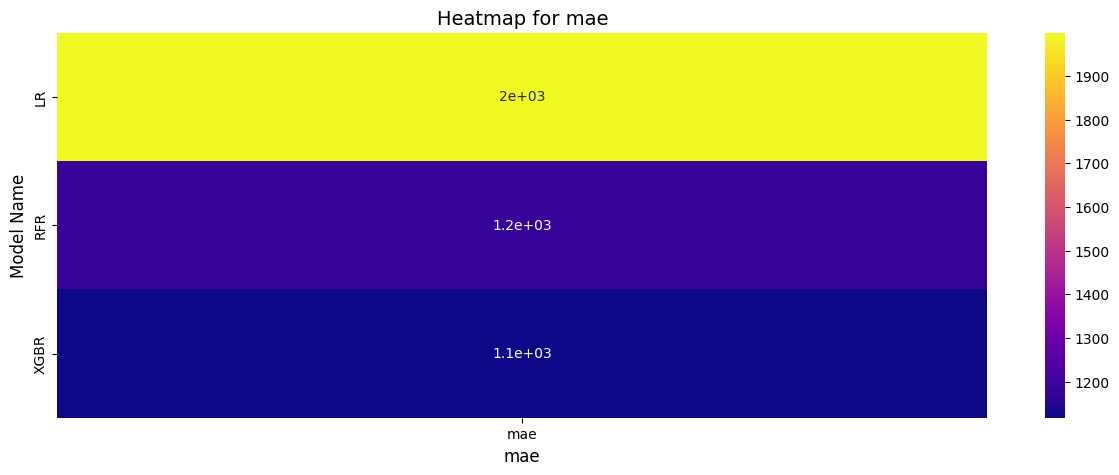

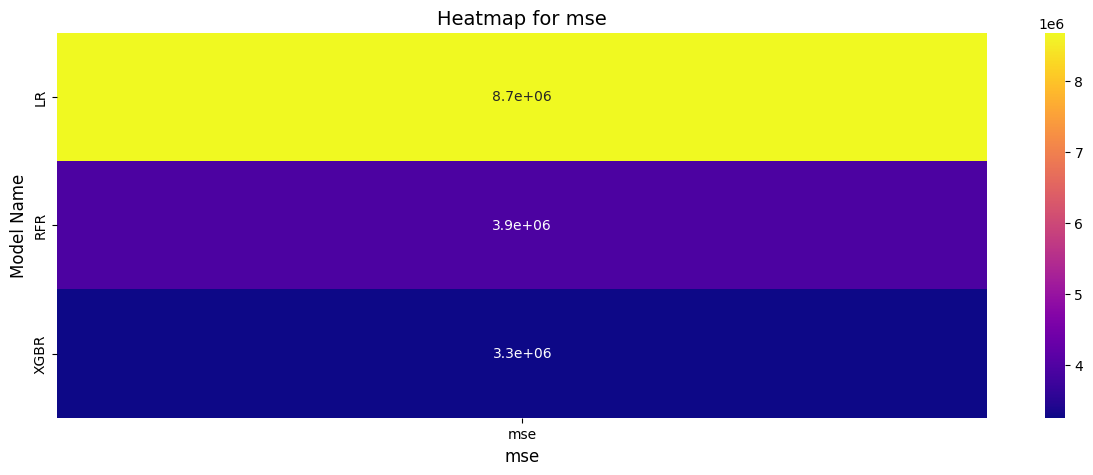

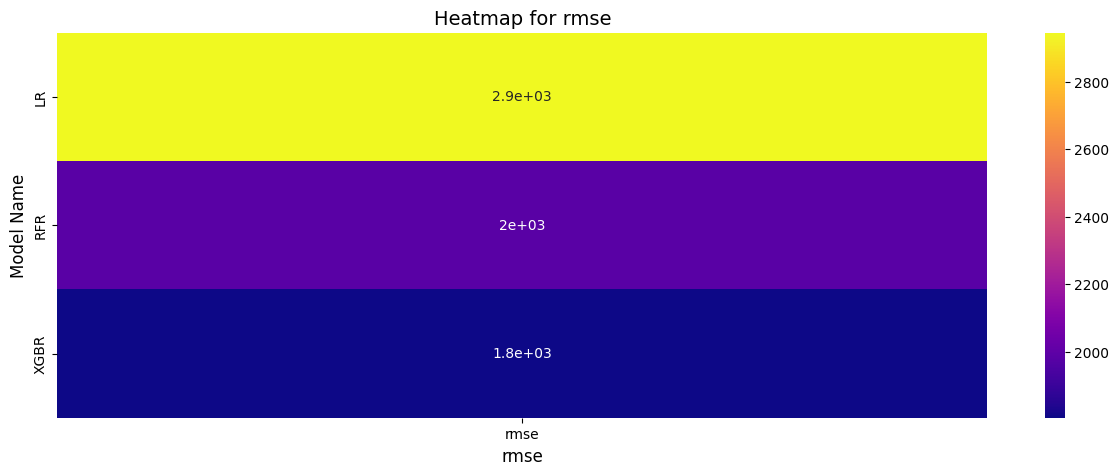

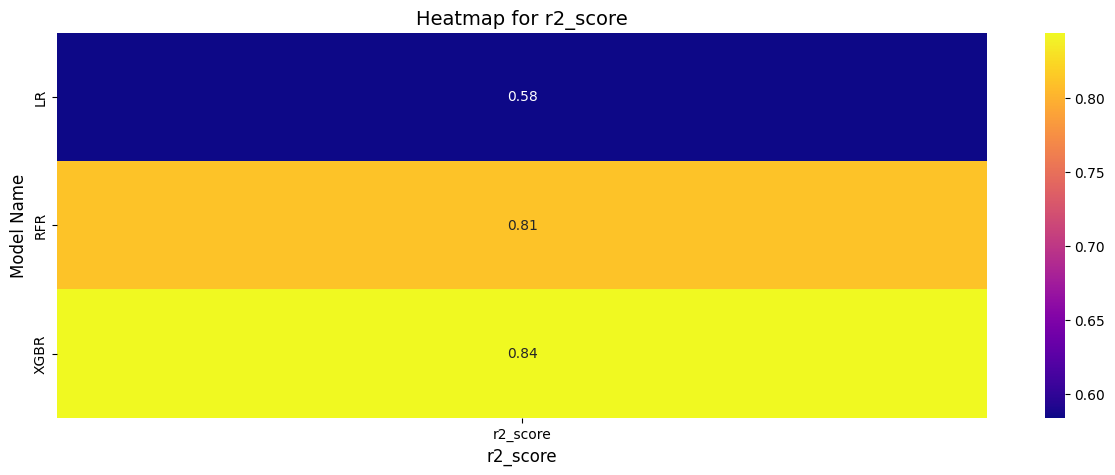

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming master_score and metrics_columns are defined

metrics_columns = ['mae', 'mse', 'rmse', 'r2_score']

for i in metrics_columns:
    plt.figure(figsize=(15,5))
    sns.heatmap(data=master_score[[i]], yticklabels=master_score['Model_Name'], annot=True, cmap='plasma')
    plt.title(f'Heatmap for {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Model Name', fontsize=12)
    plt.show()


<h3>Hyperparameter Tuning</h3>

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# Setting up the Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Setting GridSearchCV instance
grid_search = GridSearchCV(
    estimator=XGBR,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [58]:
# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [59]:
# Finding best combination of parameters and their score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.8441285184422632


In [60]:
# Evaluating the best model on test data
Tuned_XGBC = grid_search.best_estimator_
y_pred = Tuned_XGBC.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8358015809816939


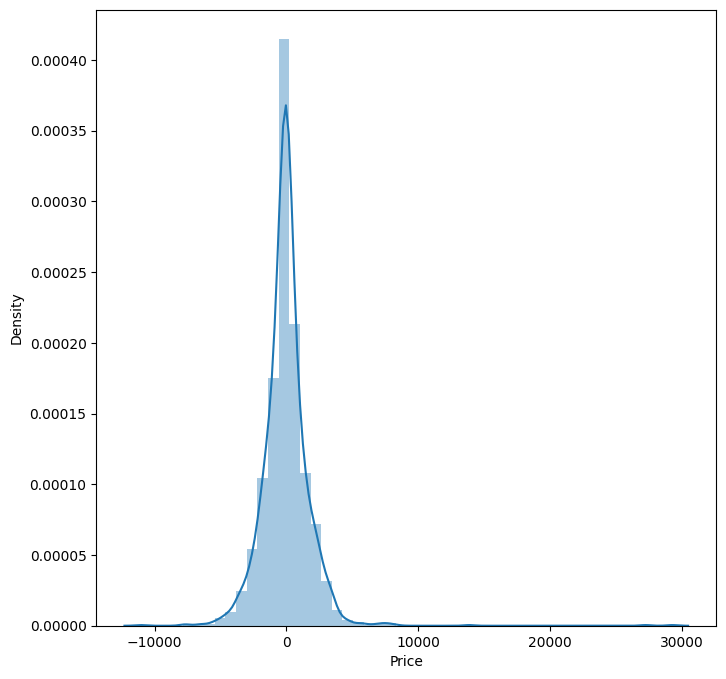

In [61]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred)
plt.show()

Loading New Data

In [63]:
# Loading test data
test_data = pd.read_csv('Test_set.csv')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Creating Function for Data Preprocessing

In [66]:
def data_preprocessing(test_data):
    # Removing Null Values
    test_data.dropna(inplace=True)

    # Removing Duplicate Values
    test_data.drop_duplicates(inplace=True)

    # Dropping columns
    test_data.drop(columns=['Additional_Info', 'Route'], inplace=True)

    # Converting Date_ofJourney to datetime series
    test_data["Date_of_Journey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y")

    # Extracting day and month from Date_ofJourney
    test_data["Journey_day"] = test_data["Date_of_Journey"].dt.day
    test_data["Journey_month"] = test_data["Date_of_Journey"].dt.month

    # Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
    test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

    # Extracting Hours
    test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

    # Extracting Minutes
    test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

    # Now we can drop Dep_Time as it is of no use
    test_data.drop(["Dep_Time"], axis = 1, inplace = True)

    # Extracting Hours
    test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour

    # Extracting Minutes
    test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

    # Now we can drop Arrival_Time as it is of no use
    test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

    # Assigning and converting Duration column into list
    duration = list(test_data["Duration"])

    for i in range(len(duration)):
        if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
            else:
                duration[i] = "0h " + duration[i]           # Adds 0 hour

    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
        
    # Adding duration_hours and duration_mins list to train_data dataframe
    test_data["Duration_hours"] = duration_hours
    test_data["Duration_mins"] = duration_mins

    test_data.drop(["Duration"], axis = 1, inplace = True)

    # Label Encoding on Total_Stops
    test_data['Total_Stops'] = test_data['Total_Stops'].replace(to_replace=['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],value=[0,1,2,3,4])

    # One-Hot Encoding on Airline
    Airline = test_data[["Airline"]]
    Airline = pd.get_dummies(Airline, drop_first= True)
    test_data['Airline_Trujet']=0 # As this column is missing in final dataframe, we will add it with assigning all the values as 0.

    # One-Hot Encoding on Airline
    Source = test_data[["Source"]]
    Source = pd.get_dummies(Source, drop_first= True)

    # One-Hot Encoding on Airline
    Destination = test_data[["Destination"]]
    Destination = pd.get_dummies(Destination, drop_first = True)

    # Adding Airline, Source and Destination to test_data
    test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)

    # Dropping some unncesessary columns
    test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

    # Specifying the order of columns
    test_data=test_data[['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
        'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
        'Airline_Jet Airways', 'Airline_Jet Airways Business',
        'Airline_Multiple carriers',
        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
        'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
        'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
        'Destination_Kolkata', 'Destination_New Delhi']]
    
    return test_data

In [67]:
# Preprocessing the data for predictions
test_data = data_preprocessing(test_data)

In [68]:
# Checking preprocessed data
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,...,False,False,False,False,False,False,True,False,False,False


<h3>Predicting Prices for New Data</h3>

In [69]:
price_predict = Tuned_XGBC.predict(test_data)
price_predict[:10]

array([11915.006,  4549.323, 14031.351, 10797.75 ,  4393.375, 10976.824,
        9093.489,  5976.507,  4792.555, 13071.013], dtype=float32)

Conclusion

This project effectively demonstrates that machine learning techniques can predict flight ticket prices with a high level of accuracy. By meticulously preprocessing data, engineering features, and applying various regression models, we identified significant factors influencing flight costs, such as airline choice, travel dates, departure city, destination, and number of stops. Among the models tested, the XGBoost Regressor performed exceptionally well, highlighting its ability to capture intricate data relationships.

This analysis highlights the potential of data science in addressing seemingly unpredictable airline pricing strategies, providing valuable insights for both travelers and airlines. Future improvements could involve integrating additional data sources, exploring alternative models and optimizing their parameters, and developing a user-friendly interface for enhanced user interaction.